In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("urban_pedestrian_locations_with_labels.csv")
df.head()

x_position  y_position  true_cluster
0    0.830586   -0.447733             1
1    0.701678    0.816918             0
2    1.022080   -0.492571             1
3   -0.316765    0.953438             0
4    0.293226    1.057185             0

In [28]:
# scenario -> we are trying to analyze pedestrian locations at a specific time in a city square. 
# each dot is a person. clustering will help discover natural groups or congested areas
# here we have a true_cluster column. this is actually a label. so this is not a clustering dataset
# it is a classification problem. however we will ignore true_cluster column
# and we will see how we could cluster pedestrians without the true_cluster label as if we didn't have that column
# later on we will use that column to assess whether we dbscan worked or not.
# in a real life scenario, obviously we would need clustering performance metrics like silhoutte to determine the success

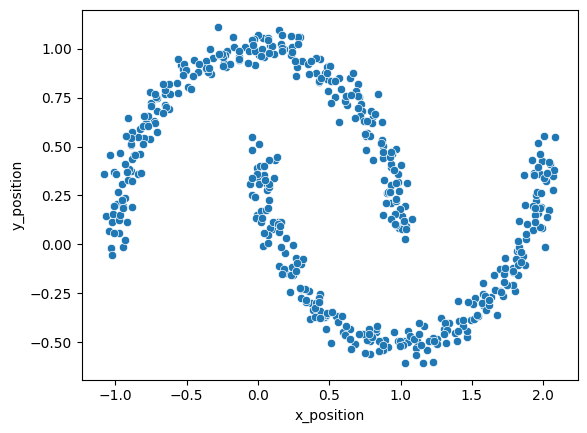

In [29]:
df = df.drop("true_cluster", axis=1)
sns.scatterplot(data=df, x="x_position", y="y_position")
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x_position  500 non-null    float64
 1   y_position  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

## Parameters

**eps**: `float`, default=`0.5`
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples**: `int`, default=`5`
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If `min_samples` is set to a higher value, DBSCAN will find denser clusters; whereas if it is set to a lower value, the found clusters will be more sparse.

In [32]:
dbscan.fit(X_scaled)

DBSCAN()

In [33]:
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

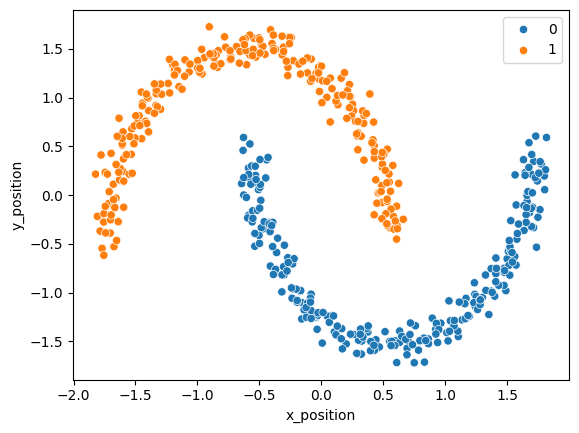

In [34]:
# let's visualize the results
X_scaled = pd.DataFrame(X_scaled, columns = ["x_position", "y_position"])
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=dbscan.labels_)
plt.show()

In [35]:
# let's compare it with the original labels (we do not have this option in a real life case
# but let's just see if it works or not
df = pd.read_csv("urban_pedestrian_locations_with_labels.csv")
df.columns

Index(['x_position', 'y_position', 'true_cluster'], dtype='object')

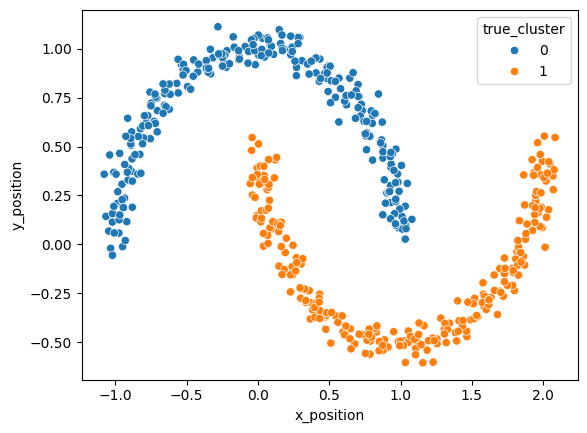

In [36]:
sns.scatterplot(data=df, x="x_position", y="y_position", hue="true_cluster")
plt.show()

In [37]:
# as you can see it produces the same result
# obviously we could be in a situation where we had to perform hyperparameter tuning

In [38]:
# Hyperparameter grids
eps_values = [0.1,0.2,0.3,0.4,0.5,0.6]
min_samples_values = [4,5,6]

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        # Skip if all points are noise or only one cluster found
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(X_scaled, labels)
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'Silhouette': silhouette,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
        })

# Convert to DataFrame and sort by silhouette 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette', ascending=False)

In [41]:
results_df

eps  min_samples  Silhouette  n_clusters
4   0.2            5    0.389338           2
3   0.2            4    0.389338           2
14  0.5            6    0.389338           2
11  0.4            6    0.389338           2
5   0.2            6    0.389338           2
6   0.3            4    0.389338           2
8   0.3            6    0.389338           2
7   0.3            5    0.389338           2
9   0.4            4    0.389338           2
10  0.4            5    0.389338           2
16  0.6            5    0.389338           2
15  0.6            4    0.389338           2
12  0.5            4    0.389338           2
13  0.5            5    0.389338           2
17  0.6            6    0.389338           2
2   0.1            6    0.287040          18
0   0.1            4    0.146899           9
1   0.1            5    0.146570          15

In [42]:
# let's try the same thing with hdbscan, rather than dbscan
from sklearn.cluster import HDBSCAN
hdbscan = HDBSCAN()

**min_cluster_size** : int, default=5 The minimum number of samples in a group for that group to be considered a cluster; groupings smaller than this size will be left as noise.

**min_samples** : int, default=None The parameter `k` used to calculate the distance between a point `x_p` and its k-th nearest neighbor. When `None`, defaults to `min_cluster_size`.

In [43]:
# there is no epsilon in hdbscan as we discussed, so let's try this one without any hyperparameter tuning first

In [44]:
hdbscan.fit(X_scaled)

HDBSCAN()

In [45]:
hdbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

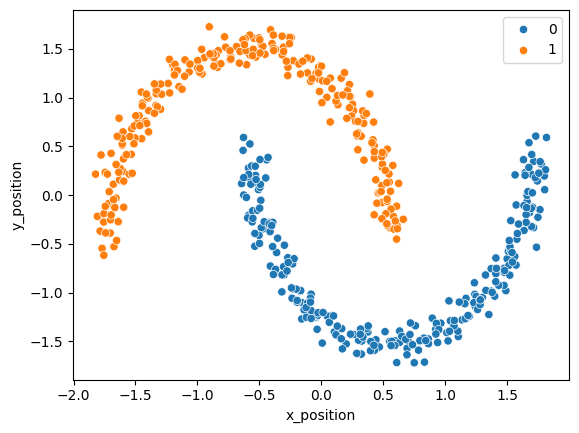

In [46]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=hdbscan.labels_)
plt.show()

In [47]:
# as you can see, hdbscan works great as well
# if we had to do hyperparameter tuning, we could have done it in the same way

In [48]:
min_cluster_sizes = [3, 5, 7, 10]
min_samples = [None, 3, 5, 7]

In [49]:
results = []

for min_cluster in min_cluster_sizes:
    for min_sample in min_samples:
        hdb = HDBSCAN(min_cluster_size=min_cluster, min_samples=min_sample).fit(X_scaled)
        labels = hdb.labels_
        # Skip if all points are noise or only one cluster found
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(X_scaled, labels)
        
        results.append({
            'min_cluster_size': min_cluster,
            'min_samples': min_sample,
            'Silhouette': silhouette,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
        })

# Convert to DataFrame and sort by silhouette 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette', ascending=False)

In [50]:
results_df

min_cluster_size  min_samples  Silhouette  n_clusters
3                  3          7.0    0.389338           2
2                  3          5.0    0.389338           2
5                  5          3.0    0.389338           2
4                  5          NaN    0.389338           2
6                  5          5.0    0.389338           2
7                  5          7.0    0.389338           2
9                  7          3.0    0.389338           2
8                  7          NaN    0.389338           2
12                10          NaN    0.389338           2
13                10          3.0    0.389338           2
10                 7          5.0    0.389338           2
11                 7          7.0    0.389338           2
14                10          5.0    0.389338           2
15                10          7.0    0.389338           2
1                  3          3.0   -0.001274          30
0                  3          NaN   -0.001274          30